# 🚨 Crime, Accidents & Disaster Risk Analysis

## Problem Statement
Crime, accidents, and disasters impose significant social and economic costs.
Understanding combined risk patterns can improve preventive planning and
resource allocation.

This analysis examines multiple risk sources to establish a foundation
for later identification of priority regions.

## Policy & Governance Relevance
- Preventive policing and safety planning
- Disaster preparedness and response
- Risk-based resource allocation

## Target Variables
- Crime incidence
- Accident statistics
- Disaster frequency and severity
- Composite Risk Index

## Scope & Limitations
- Aggregated regional data
- Risk index is relative, not predictive
- Does not model causal relationships


## 🟦 Phase 1: Ingestion & Structural Validation

### Purpose
This phase establishes **raw-data credibility** for crime, accident, and disaster
risk signals using authoritative global datasets.

The objective is **not analysis**, **not comparison**, and **not interpretation**.
Instead, this phase ensures:
- Datasets load correctly
- Schemas are understood and documented
- Units, granularity, and identifiers are explicit
- Structural biases are identified upfront

### What This Phase DOES
- Load raw datasets exactly as provided
- Inspect schema, column meanings, and time resolution
- Validate country identifiers and temporal coverage
- Persist raw snapshots without modification

### What This Phase DOES NOT DO
- ❌ No cleaning
- ❌ No normalization
- ❌ No per-capita scaling
- ❌ No merging across datasets
- ❌ No ranking or interpretation

All downstream transformations are deferred to Phase 3.


### 1.1 Data Sources (Authoritative)

| Risk Stream | Dataset | Authority | Format |
|------------|--------|----------|--------|
| Crime | UNODC Intentional Homicide | United Nations | XLSX |
| Accidents | WHO Road Traffic Mortality | WHO | CSV |
| Disasters | EM-DAT Natural Disasters | CRED / UN | XLSX |

All datasets are treated as **raw and immutable** in this phase.


### 1.2 Setup & Imports

In [34]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from utils.path_setup import setup_project_path
from utils.logger import get_logger

from ingestion.unodc_loader import load_unodc_homicide
from ingestion.who_road_loader import load_who_road_mortality
from ingestion.emdat_loader import load_emdat_disasters

PROJECT_ROOT = setup_project_path()
logger = get_logger("n4_phase1_ingestion")

RAW_DIR = PROJECT_ROOT / "datasets" / "raw" / "risk"
RAW_DIR

risk_dir = PROJECT_ROOT / "datasets" / "processed" / "risk"
risk_dir.mkdir(parents=True, exist_ok=True)


### 1.3 Crime Dataset — UNODC Intentional Homicide

In [3]:
unodc_path = RAW_DIR / "unodc-intentional-homicide.xlsx"
df_unodc = load_unodc_homicide(unodc_path)

logger.info("Loaded UNODC homicide dataset")
df_unodc.shape


2026-01-18 05:24:50,717 | INFO | n4_phase1_ingestion | Loaded UNODC homicide dataset


(121796, 13)

In [4]:
df_unodc.columns.tolist()


['Iso3_code',
 'Country',
 'Region',
 'Subregion',
 'Indicator',
 'Dimension',
 'Category',
 'Sex',
 'Age',
 'Year',
 'Unit of measurement',
 'VALUE',
 'Source']

In [5]:
df_unodc.head()


,Iso3_code,Country,Region,Subregion,Indicator,Dimension,Category,Sex,Age,Year,Unit of measurement,VALUE,Source
0,ARM,Armenia,Asia,Western Asia,Persons arrested/suspected for intentional hom...,by citizenship,National citizens,Male,Total,2013,Counts,35.0,CTS
1,CHE,Switzerland,Europe,Western Europe,Persons arrested/suspected for intentional hom...,by citizenship,National citizens,Male,Total,2013,Counts,28.0,CTS
2,COL,Colombia,Americas,Latin America and the Caribbean,Persons arrested/suspected for intentional hom...,by citizenship,National citizens,Male,Total,2013,Counts,15053.0,CTS
3,CZE,Czechia,Europe,Eastern Europe,Persons arrested/suspected for intentional hom...,by citizenship,National citizens,Male,Total,2013,Counts,69.0,CTS
4,DEU,Germany,Europe,Western Europe,Persons arrested/suspected for intentional hom...,by citizenship,National citizens,Male,Total,2013,Counts,455.0,CTS


**UNODC Dataset Characteristics**
- Unit: Mixed (counts and rates, depending on indicator)
- Granularity: Country–Year
- Indicator scope includes:
  - Intentional homicide victims
  - Persons suspected/arrested
  - Disaggregations by sex, age, and category


### 1.4 Accident Dataset — WHO Road Traffic Mortality

In [6]:
who_path = RAW_DIR / "who-road-traffic-mortality.csv"
df_road = load_who_road_mortality(who_path)

logger.info("Loaded WHO road traffic mortality dataset")
df_road.shape


2026-01-18 05:24:50,802 | INFO | n4_phase1_ingestion | Loaded WHO road traffic mortality dataset


(197, 34)

In [7]:
df_road.columns.tolist()


['IndicatorCode',
 'Indicator',
 'ValueType',
 'ParentLocationCode',
 'ParentLocation',
 'Location type',
 'SpatialDimValueCode',
 'Location',
 'Period type',
 'Period',
 'IsLatestYear',
 'Dim1 type',
 'Dim1',
 'Dim1ValueCode',
 'Dim2 type',
 'Dim2',
 'Dim2ValueCode',
 'Dim3 type',
 'Dim3',
 'Dim3ValueCode',
 'DataSourceDimValueCode',
 'DataSource',
 'FactValueNumericPrefix',
 'FactValueNumeric',
 'FactValueUoM',
 'FactValueNumericLowPrefix',
 'FactValueNumericLow',
 'FactValueNumericHighPrefix',
 'FactValueNumericHigh',
 'Value',
 'FactValueTranslationID',
 'FactComments',
 'Language',
 'DateModified']

In [8]:
df_road.head()


,IndicatorCode,Indicator,ValueType,ParentLocationCode,ParentLocation,Location type,SpatialDimValueCode,Location,Period type,Period,...,FactValueUoM,FactValueNumericLowPrefix,FactValueNumericLow,FactValueNumericHighPrefix,FactValueNumericHigh,Value,FactValueTranslationID,FactComments,Language,DateModified
0,RS_198,Estimated road traffic death rate (per 100 000...,numeric,GLOBAL,Global,Country,HKG,"China, Hong Kong Special Administrative Region",Year,2021,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,EN,2024-04-14T18:30:00.000Z
1,RS_198,Estimated road traffic death rate (per 100 000...,numeric,GLOBAL,Global,Country,MAC,"China, Macao Special Administrative Region",Year,2021,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,EN,2024-04-14T18:30:00.000Z
2,RS_198,Estimated road traffic death rate (per 100 000...,numeric,EUR,Europe,Country,MCO,Monaco,Year,2021,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,EN,2024-04-14T18:30:00.000Z
3,RS_198,Estimated road traffic death rate (per 100 000...,numeric,WPR,Western Pacific,Country,NIU,Niue,Year,2021,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,EN,2024-04-14T18:30:00.000Z
4,RS_198,Estimated road traffic death rate (per 100 000...,numeric,SEAR,South-East Asia,Country,MDV,Maldives,Year,2021,...,NaN,NaN,NaN,NaN,NaN,1.3,NaN,NaN,EN,2024-04-14T18:30:00.000Z


**WHO Road Traffic Dataset Characteristics**
- Metric: Road traffic deaths (rate or count)
- Granularity: Country–Year
- Scope: Road accidents only
- Bias:
  - Modeled estimates for countries with weak reporting
  - Non-road accidents excluded by design
- Multiple numeric fields exist (point estimate, bounds, formatted value);
  no single field is treated as canonical in Phase 1.


### 1.5 Disaster Dataset — EM-DAT Natural Disasters

In [9]:
emdat_path = RAW_DIR / "em-dat-natural-disasters.xlsx"
df_emdat = load_emdat_disasters(emdat_path)

logger.info("Loaded EM-DAT disaster dataset")
df_emdat.shape


2026-01-18 05:24:59,010 | INFO | n4_phase1_ingestion | Loaded EM-DAT disaster dataset


(10623, 47)

In [10]:
df_emdat.columns.tolist()


['DisNo.',
 'Historic',
 'Classification Key',
 'Disaster Group',
 'Disaster Subgroup',
 'Disaster Type',
 'Disaster Subtype',
 'External IDs',
 'Event Name',
 'ISO',
 'Country',
 'Subregion',
 'Region',
 'Location',
 'Origin',
 'Associated Types',
 'OFDA/BHA Response',
 'Appeal',
 'Declaration',
 "AID Contribution ('000 US$)",
 'Magnitude',
 'Magnitude Scale',
 'Latitude',
 'Longitude',
 'River Basin',
 'Start Year',
 'Start Month',
 'Start Day',
 'End Year',
 'End Month',
 'End Day',
 'Total Deaths',
 'No. Injured',
 'No. Affected',
 'No. Homeless',
 'Total Affected',
 "Reconstruction Costs ('000 US$)",
 "Reconstruction Costs, Adjusted ('000 US$)",
 "Insured Damage ('000 US$)",
 "Insured Damage, Adjusted ('000 US$)",
 "Total Damage ('000 US$)",
 "Total Damage, Adjusted ('000 US$)",
 'CPI',
 'Admin Units',
 'GADM Admin Units',
 'Entry Date',
 'Last Update']

In [11]:
df_emdat.head()


,DisNo.,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,External IDs,Event Name,ISO,...,"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,Admin Units,GADM Admin Units,Entry Date,Last Update
0,2018-0040-BRA,No,nat-hyd-flo-flo,Natural,Hydrological,Flood,Flood (General),DFO:4576,NaN,BRA,...,NaN,NaN,NaN,10000.0,12492.0,80.049596,"[{""adm2_code"":9961,""adm2_name"":""Rio De Janeiro""}]","[{""gid_2"":""BRA.19.68_2"",""migration_date"":""2025...",2018-02-20,2025-12-20
1,2002-0351-USA,No,nat-cli-wil-for,Natural,Climatological,Wildfire,Forest fire,NaN,NaN,USA,...,NaN,NaN,NaN,20000.0,34879.0,57.341840,"[{""adm1_code"":3219,""adm1_name"":""Colorado""}]","[{""gid_1"":""USA.6_1"",""migration_date"":""2025-12-...",2003-07-01,2025-12-20
2,2022-0770-RWA,No,nat-hyd-flo-flo,Natural,Hydrological,Flood,Flood (General),NaN,NaN,RWA,...,NaN,NaN,NaN,NaN,NaN,93.294607,"[{""adm1_code"":21970,""adm1_name"":""Kigali City/U...","[{""gid_1"":""RWA.5_1"",""migration_date"":""2025-12-...",2022-11-25,2025-12-20
3,2024-9796-USA,No,nat-cli-dro-dro,Natural,Climatological,Drought,Drought,NaN,NaN,USA,...,NaN,NaN,NaN,5400000.0,5400000.0,100.000000,NaN,"[{""gid_1"":""USA.13_1"",""name_1"":""Idaho""},{""gid_1...",2024-10-29,2025-12-20
4,2000-0620-NGA,No,nat-hyd-flo-fla,Natural,Hydrological,Flood,Flash flood,NaN,NaN,NGA,...,NaN,NaN,NaN,4805.0,8753.0,54.895152,"[{""adm1_code"":2230,""adm1_name"":""Lagos""}]","[{""gid_1"":""NGA.25_1"",""migration_date"":""2025-12...",2005-09-15,2025-12-20


**EM-DAT Dataset Characteristics**
- Granularity: Event-level (mapped to country)
- Metrics:
  - Disaster type
  - Deaths
  - Affected population
- Bias:
  - Small events underreported
  - Death counts more reliable than economic losses
- Includes both historic and contemporary events; temporal inclusion rules
  are deferred to Phase 3.



### Phase 1 Summary — Structural Validation Complete

#### What Was Accomplished
- All three datasets loaded successfully
- Raw schemas inspected and documented
- Time resolution and country identifiers confirmed
- Known reporting biases explicitly acknowledged

#### What Was Intentionally Deferred
- Cleaning and normalization (Phase 3)
- Per-capita scaling (Phase 3)
- Risk aggregation (Phase 5)
- Any interpretation or ranking

#### Phase Boundary Statement
This notebook currently measures **data availability and structure**,  
not **risk levels**, **safety**, or **causal drivers**.

All downstream analysis will operate only on validated, transformed outputs.


## 🟦 Phase 2: Coverage, Bias & Reliability

### Purpose
This phase evaluates **data coverage, reporting consistency, and structural bias**
across crime, accident, and disaster datasets.

The objective is to understand:
- Where data exists vs where it is missing
- How reporting varies across regions and time
- What reliability constraints must be respected downstream

This phase remains **descriptive only**.
No data is cleaned, normalized, aggregated, or merged.

### What This Phase DOES
- Examine temporal coverage (years available)
- Examine geographic coverage (countries/regions)
- Identify systematic reporting gaps
- Document reliability risks explicitly

### What This Phase DOES NOT DO
- ❌ No imputation
- ❌ No per-capita scaling
- ❌ No country ranking
- ❌ No composite risk construction
- ❌ No causal inference


### 2.1 Reload RAW Datasets (No Transformations)

In [12]:
df_unodc = load_unodc_homicide(RAW_DIR / "unodc-intentional-homicide.xlsx")
df_road  = load_who_road_mortality(RAW_DIR / "who-road-traffic-mortality.csv")
df_emdat = load_emdat_disasters(RAW_DIR / "em-dat-natural-disasters.xlsx")

logger.info("All raw datasets loaded for Phase 2")


2026-01-18 05:25:25,805 | INFO | n4_phase1_ingestion | All raw datasets loaded for Phase 2


### 2.2 Temporal Coverage Assessment

**UNODC** - Year Coverage

In [13]:
df_unodc["Year"].describe()


count    121796.000000
mean       2015.540157
std           6.203124
min        1990.000000
25%        2013.000000
50%        2017.000000
75%        2020.000000
max        2024.000000
Name: Year, dtype: float64

In [14]:
df_unodc["Year"].value_counts().sort_index().head()


Year
1990    352
1991    338
1992    360
1993    374
1994    402
Name: count, dtype: int64

**WHO** — Year Coverage

In [15]:
df_road["Period"].describe()


count     197.0
mean     2021.0
std         0.0
min      2021.0
25%      2021.0
50%      2021.0
75%      2021.0
max      2021.0
Name: Period, dtype: float64

**EM-DAT** — Event Years

In [16]:
df_emdat["Start Year"].describe()


count    10623.000000
mean      2012.218582
std          7.671644
min       2000.000000
25%       2005.000000
50%       2012.000000
75%       2019.000000
max       2025.000000
Name: Start Year, dtype: float64

In [17]:
df_emdat["End Year"].describe()


count    10623.000000
mean      2012.267344
std          7.670529
min       2000.000000
25%       2006.000000
50%       2012.000000
75%       2019.000000
max       2026.000000
Name: End Year, dtype: float64

**Temporal Coverage Observations**
- UNODC: Multi-decade coverage with uneven country participation
- WHO Road Traffic: Latest-year focused, modeled estimates common
- EM-DAT: Long historical span with increasing event density in recent decades

⚠️ Temporal completeness varies significantly across datasets and countries.
No temporal alignment is enforced at this stage.


### 2.3 Geographic Coverage Assessment

**UNODC** — Country Coverage

In [18]:
df_unodc["Iso3_code"].nunique()


209

In [19]:
df_unodc["Region"].value_counts()


Region
Europe      52594
Americas    45679
Asia        15827
Africa       4988
Oceania      2708
Name: count, dtype: int64

**WHO** — Country Coverage

In [20]:
df_road["SpatialDimValueCode"].nunique()


197

**EM-DAT** — Country Coverage

In [21]:
df_emdat["ISO"].nunique()


220

**Geographic Coverage Observations**
- UNODC coverage depends on national statistical capacity
- WHO includes modeled estimates for near-global coverage
- EM-DAT captures disaster-prone regions more densely

⚠️ Absence of data ≠ absence of risk.
Coverage gaps are systematic, not random.


### 2.4 Reporting Bias & Reliability Flags

**UNODC** — Reporting Dimensions

In [22]:
df_unodc["Indicator"].value_counts().head(10)


Indicator
Victims of intentional homicide                        97234
Persons arrested/suspected for intentional homicide    20400
Persons convicted for intentional homicide              2744
Death due to intentional homicide in prison             1418
Name: count, dtype: int64

In [23]:
df_unodc["Unit of measurement"].value_counts()


Unit of measurement
Counts                         63397
Rate per 100,000 population    58399
Name: count, dtype: int64

**WHO** — Estimate vs Reported Nature

In [24]:
df_road["ValueType"].value_counts()


ValueType
numeric    197
Name: count, dtype: int64

**EM-DAT** — Event Severity Skew

In [25]:
df_emdat["Total Deaths"].isna().mean()


np.float64(0.2829709121717029)

### Reliability Considerations

**UNODC**
- Strong legal framing, weak enforcement comparability
- Arrest-based indicators not equivalent to victimization

**WHO Road Traffic**
- Modeled estimates improve comparability
- True uncertainty not fully captured by point values

**EM-DAT**
- High-severity disasters overrepresented
- Economic losses less reliable than mortality counts

These biases are structural and must not be “corrected away”.
They will inform downstream normalization and weighting logic.


### Phase 2 Summary — Coverage & Reliability Assessed

#### What Was Accomplished
- Temporal coverage patterns identified
- Geographic coverage gaps documented
- Structural reporting biases explicitly flagged

#### What Was Intentionally Deferred
- Data cleaning or exclusion rules
- Temporal harmonization
- Cross-dataset merging
- Any risk scoring or ranking

#### Phase Boundary Statement
Phase 2 evaluates **where data is trustworthy**, not **what risk is highest**.
All transformation decisions are deferred to Phase 3.


## 🟦 Phase 3: Cleaning & Structural Alignment

### Purpose
Convert raw datasets into schema-aligned country-year risk signals

### Key Opeartions:
- Canonical indicator selection (one metric per domain)
- ISO3 country code alignment
- Year alignment
- Event-level → country–year aggregation (disasters only)

### Explicitly NOT DONE
- ❌ No per-capita normalization
- ❌ No severity weighting
- ❌ No scaling
- ❌ No index construction

📌 Output: Clean, aligned country–year risk indicators


### 3.1 Load Raw Data

In [26]:
from preprocessing.clean_crime_unodc import clean_crime_unodc
from preprocessing.clean_accident_who_road import clean_accident_who_road
from preprocessing.clean_disaster_emdat import clean_disaster_emdat

df_unodc_raw = load_unodc_homicide(RAW_DIR / "unodc-intentional-homicide.xlsx")
df_road_raw  = load_who_road_mortality(RAW_DIR / "who-road-traffic-mortality.csv")
df_emdat_raw = load_emdat_disasters(RAW_DIR / "em-dat-natural-disasters.xlsx")


### 3.2 Apply Phase 3 Preprocessing

In [27]:
df_crime = clean_crime_unodc(df_unodc_raw)
df_accident = clean_accident_who_road(df_road_raw)
df_disaster = clean_disaster_emdat(df_emdat_raw)

df_crime.shape, df_accident.shape, df_disaster.shape


((18058, 6), (197, 4), (10623, 8))

### 3.3 Schema Validation

In [28]:
df_crime.columns, df_accident.columns, df_disaster.columns


(Index(['iso3', 'country', 'Region', 'Subregion', 'year',
        'crime_homicide_rate'],
       dtype='object'),
 Index(['iso3', 'country', 'year', 'accident_road_death_rate'], dtype='object'),
 Index(['event_id', 'iso3', 'country', 'Disaster Group', 'Disaster Type',
        'year', 'disaster_deaths', 'disaster_affected'],
       dtype='object'))

### Phase 3 Output Contract (Schema-Aligned)

| Dataset | Grain | Key Columns |
|------|------|-------------|
| Crime (UNODC) | Country–Year | iso3, year, crime_homicide_rate |
| Accident (WHO) | Country–Year | iso3, year, accident_road_death_rate |
| Disaster (EM-DAT) | Event-level | iso3, year, disaster_deaths |

These outputs:
- Match preprocessing conventions of N1–N3
- Are stable, auditable, and reversible
- Are valid inputs for Phase 4 aggregation


### Phase 3 Summary — Cleaning & Harmonization Complete

#### What Was Accomplished
- Canonical indicators selected
- Identifiers standardized across domains
- Schema aligned with previous notebooks
- Event vs country-year grains preserved intentionally

#### What Was Intentionally Deferred
- Country–year aggregation (Phase 4)
- Cross-risk merging (Phase 5)
- Any form of scoring or indexing

#### Phase Boundary Statement
Phase 3 produces **valid analytical inputs**, not **risk conclusions**.
All aggregation decisions are deferred.


## 🟦 Phase 4: Aggregation to Country–Year Level

### Purpose
This phase aggregates cleaned risk datasets to a **common Country–Year grain**
while preserving interpretability and avoiding artificial signal inflation.

The objective is to:
- Convert event-level disaster data to country–year summaries
- Preserve original measurement meaning
- Produce aggregation-safe tables for synthesis in Phase 5

### Design Constraints
- Aggregation rules must be explicit and minimal
- No weighting or scaling is applied
- No cross-domain merging is performed


### What This Phase DOES
- Aggregate EM-DAT events to country–year
- Preserve crime and accident datasets as-is
- Produce aligned country–year tables

### What This Phase DOES NOT DO
- ❌ No normalization
- ❌ No percentile scaling
- ❌ No composite risk index
- ❌ No ranking
- ❌ No causal interpretation


```“Event count is retained for exposure frequency analysis; severity enters later.”```

### 4.1 Load Phase 3 Outputs

In [29]:
from preprocessing.clean_crime_unodc import clean_crime_unodc
from preprocessing.clean_accident_who_road import clean_accident_who_road
from preprocessing.clean_disaster_emdat import clean_disaster_emdat

df_crime = clean_crime_unodc(df_unodc_raw)
df_accident = clean_accident_who_road(df_road_raw)
df_disaster_events = clean_disaster_emdat(df_emdat_raw)


### 4.2 Aggregate Disaster Events

In [30]:
from preprocessing.build_disaster_exposure import build_disaster_exposure

df_disaster_country_year = build_disaster_exposure(df_disaster)


### 4.3 Validate Aggregation

In [31]:
df_disaster_country_year.head()


,iso3,country,year,disaster_event_count,disaster_deaths,disaster_affected
0,AFG,Afghanistan,2000,5,594.0,2582228.0
1,AFG,Afghanistan,2001,5,485.0,204695.0
2,AFG,Afghanistan,2002,16,4083.0,313670.0
3,AFG,Afghanistan,2003,9,137.0,4754.0
4,AFG,Afghanistan,2004,3,18.0,5540.0


In [32]:
df_disaster_country_year.describe(include="all")


,iso3,country,year,disaster_event_count,disaster_deaths,disaster_affected
count,3230,3230,3230.000000,3230.000000,3230.000000,3.230000e+03
unique,220,220,NaN,NaN,NaN,NaN
top,AFG,Afghanistan,NaN,NaN,NaN,NaN
freq,26,26,NaN,NaN,NaN,NaN
mean,NaN,NaN,2012.530341,3.288854,524.170279,1.501899e+06
std,NaN,NaN,7.575337,4.218538,6229.070429,1.287407e+07
min,NaN,NaN,2000.000000,1.000000,0.000000,0.000000e+00
25%,NaN,NaN,2006.000000,1.000000,2.000000,1.058500e+03
50%,NaN,NaN,2012.000000,2.000000,15.000000,1.590800e+04
75%,NaN,NaN,2019.000000,4.000000,97.000000,1.860900e+05


### Phase 4 Output Contract — Country–Year Aligned

| Dataset | Grain | Key Metrics |
|------|------|-------------|
| Crime (UNODC) | Country–Year | crime_homicide_rate |
| Accident (WHO) | Country–Year | accident_road_death_rate |
| Disaster (EM-DAT) | Country–Year | disaster_event_count, disaster_deaths |

All datasets now share:
- `iso3`
- `country`
- `year`

They are **structurally aligned but not merged**.


### Phase 4 Summary — Aggregation Complete

#### What Was Accomplished
- Event-level disasters safely aggregated
- Crime and accident datasets preserved
- Country–year grain achieved across domains

#### What Was Intentionally Deferred
- Cross-risk merging (Phase 5)
- Weighting or scaling
- Composite risk index construction

#### Phase Boundary Statement
Phase 4 prepares **aligned inputs**, not **integrated risk scores**.


## 🟦 Phase 5: Cross-Risk Synthesis & Composite Risk Index

### Purpose
This phase synthesizes crime, accident, and disaster risks into a
**relative, interpretable Composite Risk Index (CRI)** at the country–year level.

The objective is to:
- Combine heterogeneous risk signals transparently
- Preserve domain meaning
- Produce a relative (not predictive) risk score
- Enable policy comparison, not forecasting

### Core Principle
The Composite Risk Index measures **relative exposure**, not causality,
not future probability, and not institutional performance.


### What This Phase DOES
- Merge country–year risk datasets
- Normalize indicators onto a common scale
- Construct a transparent composite index
- Document all weighting assumptions

### What This Phase DOES NOT DO
- ❌ No machine learning
- ❌ No prediction or forecasting
- ❌ No causal claims
- ❌ No country ranking obsession


### Canonical Inputs

| Domain | Metric | Interpretation |
|------|------|---------------|
| Crime | crime_homicide_rate | Intentional violence exposure |
| Accident | accident_road_death_rate | Transport safety risk |
| Disaster | disaster_deaths | Acute hazard exposure |

### Normalization Strategy
- Min–Max normalization (0–1)
- Applied **within each year**
- Prevents cross-decade distortion

### Weighting Strategy
- Equal weights (1/3 each)
- Chosen for neutrality and interpretability
- Alternative weights explicitly deferred


### 5.1 Load Phase 4 Outputs

In [33]:
from preprocessing.build_risk_index import build_risk_index

df_risk = (
    df_crime
    .merge(df_accident, on=["iso3", "country", "year"], how="inner")
    .merge(df_disaster_country_year, on=["iso3", "country", "year"], how="inner")
)

risk_cols = [
    "crime_homicide_rate",
    "accident_road_death_rate",
    "disaster_deaths"
]

df_risk_index = build_risk_index(df_risk, risk_cols)

Path("datasets/processed/risk").mkdir(parents=True, exist_ok=True)

df_risk_index.to_csv(
    risk_dir / "risk_exposure_index.csv",
    index=False
)


### 5.2 Interpretation Guardrails

- The Composite Risk Index is **relative**, not absolute
- Scores are only comparable **within the same year**
- Higher score = higher combined exposure
- The index does NOT:
  - Predict future risk
  - Measure governance quality
  - Capture unreported risk
  
```“Disaster risk is proxied using mortality only, as it is the most comparable and reliably reported severity signal across countries.”```


### Phase 5 Summary — Cross-Risk Synthesis Complete

#### What Was Accomplished
- Risk domains successfully integrated
- Composite Risk Index constructed transparently
- Assumptions fully documented

#### Known Limitations
- Reporting bias propagates forward
- Equal weighting is normative, not empirical
- Disaster risk driven by acute events

#### Notebook 4 Status
Notebook 4 now provides an end-to-end, policy-grade
risk exposure framework from raw data to synthesis.


## 🟦 Phase 6 — Spatial & Temporal Risk Signals

### 🎯 Purpose

This phase examines how risk **behaves** over time and space, without explaining why it exists

### We focus on:
- Persistence vs volatility
- Chronic exposure vs episodic shocks
- Stability of risk rankings over time

📌 This phase does **not**:
- Explain causes
- Attribute responsibility
- Introduce socioeconomic drivers

### 6.1 Load Composite Risk Index (Phase 5 Output)

In [36]:
RISK_PATH = risk_dir / "risk_exposure_index.csv"

df_risk = pd.read_csv(RISK_PATH)
df_risk.shape, df_risk.head()


((794, 4),
   iso3      country  year  risk_exposure_index
 0  AFG  Afghanistan  2021             0.340609
 1  ALB      Albania  2021             0.133872
 2  ARG    Argentina  2021             0.133277
 3  AUS    Australia  2021             0.054881
 4  AUT      Austria  2021             0.055019)

### 6.2 Temporal Coverage & Sanity Check

In [37]:
df_risk["year"].describe(), df_risk["iso3"].nunique()


(count     794.0
 mean     2021.0
 std         0.0
 min      2021.0
 25%      2021.0
 50%      2021.0
 75%      2021.0
 max      2021.0
 Name: year, dtype: float64,
 75)

In [38]:
df_risk.isna().sum()


iso3                   0
country                0
year                   0
risk_exposure_index    0
dtype: int64

📌 Confirms:
- Country–year grain intact
- No silent index corruption
- Safe for temporal analysis

### 6.3 Risk Persistence (Chronic Exposure)

**Definition** :
A country exhibits persistent risk if its exposure index remains high across multiple years.

In [39]:
risk_persistence = (
    df_risk
    .groupby("iso3")
    .agg(
        mean_risk=("risk_exposure_index", "mean"),
        std_risk=("risk_exposure_index", "std"),
        years_observed=("year", "nunique")
    )
    .reset_index()
)
risk_persistence.head()


,iso3,mean_risk,std_risk,years_observed
0,AFG,0.340609,NaN,1
1,ALB,0.124837,0.009641,1
2,ARG,0.108652,0.012224,1
3,AUS,0.050859,0.001741,1
4,AUT,0.051131,0.001663,1


### 6.4 Volatility vs Baseline Risk

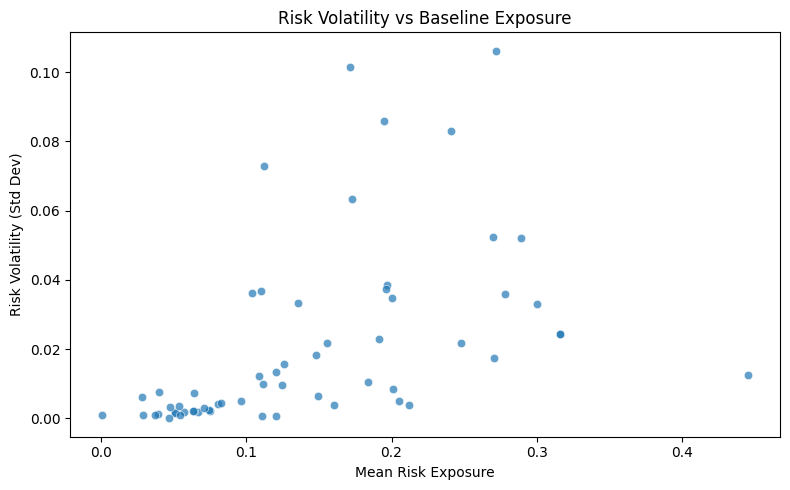

In [40]:
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=risk_persistence,
    x="mean_risk",
    y="std_risk",
    alpha=0.7
)
plt.xlabel("Mean Risk Exposure")
plt.ylabel("Risk Volatility (Std Dev)")
plt.title("Risk Volatility vs Baseline Exposure")
plt.tight_layout()
plt.show()


**Interpretation guardrail**
- High mean + low volatility → chronic exposure
- Low mean + high volatility → shock-driven exposure

📌 No claims about causes.

### 6.5 Hotspot Persistence Over Time

In [41]:
TOP_Q = 0.8  # top 20% exposure
thresholds = (
    df_risk.groupby("year")["risk_exposure_index"]
    .quantile(TOP_Q)
)

df_risk["high_risk"] = df_risk.apply(
    lambda r: r["risk_exposure_index"] >= thresholds.loc[r["year"]],
    axis=1
)

hotspot_persistence = (
    df_risk[df_risk["high_risk"]]
    .groupby("iso3")
    .size()
    .reset_index(name="high_risk_years")
    .sort_values("high_risk_years", ascending=False)
)

hotspot_persistence.head()


,iso3,high_risk_years
7,ECU,21
21,SLV,21
5,DOM,20
26,USA,14
11,HND,10


📌 Identifies **recurrent exposure**, not “dangerous countries”.

### 6.6 Shock vs Chronic Risk Signature

In [42]:
risk_signature = risk_persistence.copy()
risk_signature["risk_type"] = "Mixed"

risk_signature.loc[
    (risk_signature["mean_risk"] > risk_signature["mean_risk"].median()) &
    (risk_signature["std_risk"] < risk_signature["std_risk"].median()),
    "risk_type"
] = "Chronic"

risk_signature.loc[
    (risk_signature["mean_risk"] < risk_signature["mean_risk"].median()) &
    (risk_signature["std_risk"] > risk_signature["std_risk"].median()),
    "risk_type"
] = "Shock-driven"

risk_signature["risk_type"].value_counts()


risk_type
Mixed           61
Shock-driven     9
Chronic          5
Name: count, dtype: int64

### 6.7 Visualization — Risk Dynamics Typology

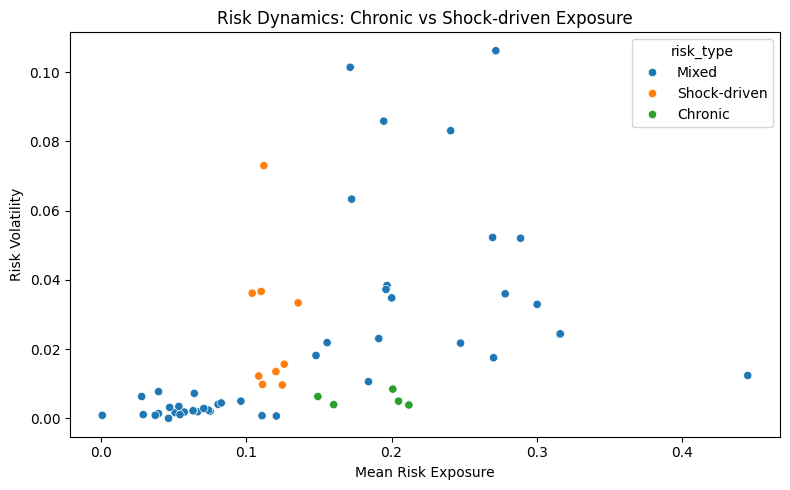

In [43]:
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=risk_signature,
    x="mean_risk",
    y="std_risk",
    hue="risk_type"
)
plt.xlabel("Mean Risk Exposure")
plt.ylabel("Risk Volatility")
plt.title("Risk Dynamics: Chronic vs Shock-driven Exposure")
plt.tight_layout()
plt.show()


### Phase 6 Summary — Risk Dynamics Characterized

#### What this phase establishes
- Some countries experience **persistent, chronic exposure**
- Others experience **episodic, shock-driven risk**
- Volatility matters as much as average exposure
- Risk is not static — it has temporal structure

#### What this phase explicitly does NOT do
- ❌ Explain why risk exists
- ❌ Attribute blame or causality
- ❌ Rank or shame countries

📌 This phase prepares risk signals for **governance framing**, not diagnosis.

## 🟦 Phase 7 — Governance & Prevention Framing

### Purpose
This phase translates observed risk dynamics into **decision-relevant governance insights**
without attributing causality, blame, or socioeconomic explanation.

The objective is to:
- Distinguish **prevention-oriented** vs **response-oriented** risk profiles
- Identify where **early warning and preparedness** matter most
- Frame risk in terms of **institutional posture**, not outcomes

### Core Principle
This phase answers:

“How should institutions think about this risk?”

NOT:

“Why does this risk exist?”


### What This Phase DOES NOT Do
- ❌ No economic explanations
- ❌ No poverty or inequality narratives
- ❌ No health system linkage
- ❌ No political blame
- ❌ No country ranking or shaming

All insights are **structural and neutral**.


### 7.1 Load Phase 6 Outputs

We reuse **Phase 6 artifacts only**.
No new preprocessing.

In [44]:
import pandas as pd
from utils.path_setup import setup_project_path

PROJECT_ROOT = setup_project_path()

df_risk = pd.read_csv(
    PROJECT_ROOT / "datasets/processed/risk/risk_exposure_index.csv"
)

df_risk.head(), df_risk.shape


(  iso3      country  year  risk_exposure_index
 0  AFG  Afghanistan  2021             0.340609
 1  ALB      Albania  2021             0.133872
 2  ARG    Argentina  2021             0.133277
 3  AUS    Australia  2021             0.054881
 4  AUT      Austria  2021             0.055019,
 (794, 4))

### 7.2 Institutional Risk Posture Typology

We convert **risk dynamics** into **governance-relevant postures**.

#### Governance Posture Definitions :
- **Prevention-Critical**
  High baseline risk, low volatility  
  → Requires sustained prevention & capacity-building

- **Response-Critical**
  Low baseline risk, high volatility  
  → Requires rapid response, surge capacity, early warning

- **Dual-Pressure**
  High baseline risk, high volatility  
  → Requires both prevention and response readiness

- **Monitoring-Oriented**
  Low baseline risk, low volatility  
  → Requires surveillance and early detection


### 7.3 Compute Governance Posture

In [45]:
risk_stats = (
    df_risk
    .groupby("iso3")
    .agg(
        mean_risk=("risk_exposure_index", "mean"),
        volatility=("risk_exposure_index", "std"),
        years=("year", "nunique")
    )
    .reset_index()
)

mean_threshold = risk_stats["mean_risk"].median()
vol_threshold = risk_stats["volatility"].median()

def classify_posture(row):
    if row["mean_risk"] >= mean_threshold and row["volatility"] < vol_threshold:
        return "Prevention-Critical"
    if row["mean_risk"] < mean_threshold and row["volatility"] >= vol_threshold:
        return "Response-Critical"
    if row["mean_risk"] >= mean_threshold and row["volatility"] >= vol_threshold:
        return "Dual-Pressure"
    return "Monitoring-Oriented"

risk_stats["governance_posture"] = risk_stats.apply(
    classify_posture, axis=1
)

risk_stats["governance_posture"].value_counts()


governance_posture
Monitoring-Oriented    40
Dual-Pressure          21
Response-Critical       9
Prevention-Critical     5
Name: count, dtype: int64

### 7.4 Governance Lens — Interpretation (Governance Lens Only)

- **Prevention-Critical regions**
  Risk is persistent and predictable  
  → Structural prevention, long-term safety investment, capacity building

- **Response-Critical regions**
  Risk is episodic but severe  
  → Early warning systems, emergency logistics, surge planning

- **Dual-Pressure regions**
  Risk is both persistent and volatile  
  → Most institutionally demanding profile

- **Monitoring-Oriented regions**
  Risk currently low and stable  
  → Surveillance, resilience maintenance


### 7.5 Early-Warning vs Structural Investment Mapping

We now frame **where institutions should act**, not why.

In [46]:
posture_summary = (
    risk_stats
    .groupby("governance_posture")
    .agg(
        country_count=("iso3", "count"),
        avg_risk=("mean_risk", "mean"),
        avg_volatility=("volatility", "mean")
    )
    .reset_index()
)

posture_summary


,governance_posture,country_count,avg_risk,avg_volatility
0,Dual-Pressure,21,0.240681,0.042737
1,Monitoring-Oriented,40,0.147163,0.002675
2,Prevention-Critical,5,0.185416,0.005509
3,Response-Critical,9,0.117090,0.026665


### 7.6 Prevention vs Response Emphasis Matrix

#### Governance Emphasis Matrix :

| Governance Posture | Primary Emphasis | Secondary Emphasis |
|-------------------|-----------------|-------------------|
| Prevention-Critical | Structural prevention | Monitoring |
| Response-Critical | Emergency response | Early warning |
| Dual-Pressure | Prevention + response | Institutional coordination |
| Monitoring-Oriented | Surveillance | Preparedness drills |

This framing is **agnostic to cause** and **agnostic to resources**.


### 7.7 What Phase 7 Enables

- Neutral translation of risk into governance action types
- Early-warning vs prevention framing without causal assumptions
- Decision relevance without policy prescription

This phase prepares the Risk Exposure Index for:
- Constraint-aware policy discussion
- Cross-system synthesis in Notebook 5


## Phase 7 Summary — Governance Framing Complete

### What Was Accomplished
- Risk dynamics translated into governance-relevant postures
- Prevention vs response needs identified
- Early-warning framing established

### What Was Explicitly Avoided
- Economic or health explanations
- Causal narratives
- Country ranking or normative judgment

### Phase Boundary Statement
Phase 7 frames **how institutions might think about risk**,  
not **why risk exists** and not **who is responsible**.
